Assignment request:

Fit an Hidden Markov Model with Gaussian emissions to the data in DSET1: it is sufficient to focus on the “Appliances” and “Lights” columns of the dataset which measure the energy consumption of appliances and lights, respectively, across a period of 4.5 months. Consider the two columnsin isolation, i.e. train two separate HMM, one for appliances and one for light.  Experiment with HMMs with a varying number of hidden states (e.g. at least 2, 3 and 4). Once trained the HMMs, perform Viterbi on a reasonably sized subsequence (e.g. 1 month of data) and plot the timeseries data highlighting (e.g. with different colours) the hidden state assigned to each timepoint by the Viterbi algorithm.  Then, try sampling a sequence of at least 100 points from the trained HMMs and show it on a plot discussing similarities and differences w.r.t. the ground truth data.

In [3]:
!pip install hmmlearn
!git clone https://github.com/Sopralapanca/ISPRMidterm2Ass1.git

Cloning into 'ISPRMidterm2Ass1'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 15 (delta 0), reused 15 (delta 0), pack-reused 0
Unpacking objects: 100% (15/15), done.


In [7]:
import pandas as pd
import numpy as np

dataset_path = '/content/ISPRMidterm2Ass1/energydata_complete.csv'

df = pd.read_csv(dataset_path)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

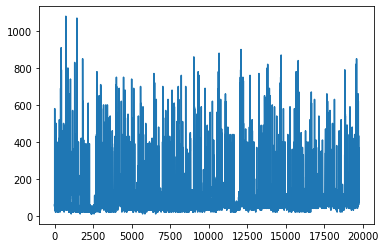

In [ ]:
df_appliances = df['Appliances']
df_appliances.plot()

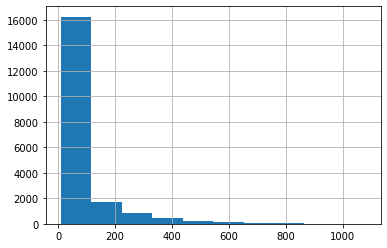

In [ ]:
df_appliances.hist()

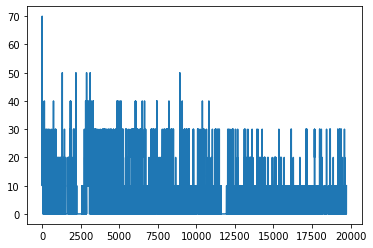

In [ ]:
df_lights = df['lights']
df_lights.plot()

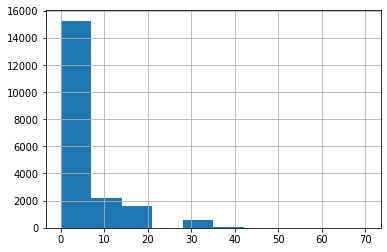

In [ ]:
df_lights.hist()

In [ ]:
import datetime
"""
Reads the data from energydata_complete.csv
:return: the whole "Appliances" column, the first 3 months of it (as tr_data) and the last 1.5 months (ts_data)
"""
def process_data(column="Appliances"):
    # sort data by date
    df = pd.read_csv(dataset_path)
    df = df[["date", column]]
    df.index = pd.to_datetime(df["date"])
    df = df.set_index('date')


    # select training and test data. Then drop the date column
    #first_day = df["date"][0]
    #last_day = first_day + datetime.timedelta(weeks=13)
    #tr_data = df[(df["date"] >= first_day) & (df["date"] <= last_day)][column]
    #test_data = df[df["date"] > last_day][column]
    #df = df[column]

    #return df.to_numpy(), tr_data.to_numpy(), test_data.to_numpy()
    return df

In [ ]:
#appliances_dataset, appliances_tr_data, appliances_ts_data = process_data(column="Appliances")
appliances_dataset = process_data(column="Appliances")
#lights_dataset, lights_tr_data, lights_ts_data = process_data(column="lights")

print(appliances_dataset.shape)

(19735, 1)


HMM

In [ ]:
def plot_viterbi(ncomp, hidden_states, subseq, column='Appliances'):
  # VITERBI PLOTS

  plt.figure()
  plt.title('Timeseries of '+ str(ncomp) + 'hidden states for appliances (Viterbi): ')
  for i in range(len(hidden_states)):
    if hidden_states[i] == 1:
        plt.scatter(subseq.index[i], subseq[column][i], c='r', label='High')
    if hidden_states[i] == 2:
        plt.scatter(subseq.index[i], subseq[column][i], c='y', label='Medium')
    if hidden_states[i] == 0:
        plt.scatter(subseq.index[i], subseq[column][i], c='g', label='Low')

In [ ]:
from google.colab import files
import os
import sys

sys.path.append('/content/markov-chain/src/')  

#here is your import
from markovchain import MarkovChain

ImportError: ignored

Creating model



Parameters of appliances model.
- Transition matrix: 
 [[0.9730353  0.0269647 ]
 [0.05926382 0.94073618]]

 Log likelihood: 
 -97986.85


Parameters of appliances model.
- Transition matrix: 
 [[0.97016469 0.01159383 0.01824149]
 [0.02264826 0.80507675 0.17227499]
 [0.05091614 0.06786138 0.88122248]]

 Log likelihood: 
 -91386.03


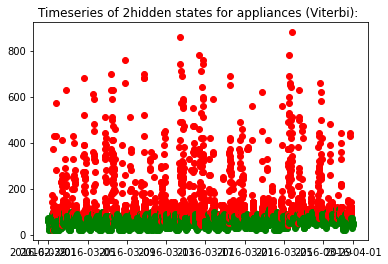

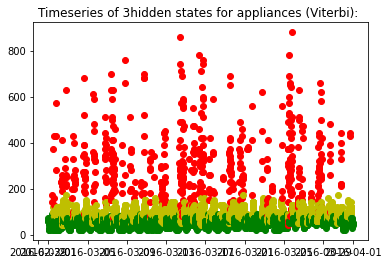

In [ ]:
from hmmlearn.hmm import GaussianHMM 
import matplotlib.pyplot as plt

#number of hidden states
#2, 3
for i in range(2,4):
  appliances_model = GaussianHMM(n_components=i, covariance_type="diag", n_iter=1000, algorithm="viterbi")
  appliances_model.fit(appliances_dataset)

  subseq = appliances_dataset['2016-03':'2016-04'] # tutto il mese di marzo
  subseq.index = pd.to_datetime(subseq.index)

  hidden_states = appliances_model.predict(subseq)

  plot_viterbi(i, hidden_states, subseq, 'Appliances')
  
  # model parameters
  P = appliances_model.transmat_
  print('\n\nParameters of appliances model.\n- Transition matrix: \n', P)
  logProb = appliances_model.score(appliances_dataset)
  print('\n Log likelihood: \n', round(logProb,2))



Sampling

Text(0.5, 0, 'Samples')

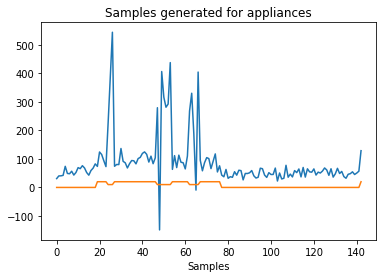

In [ ]:
# Generate new samples (visible, hidden)

# APPL
X1, Z1 = appliances_model.sample(143) # 143 is the number of measurement per day (24 hours)
plt.figure(2)
plt.plot(X1)
plt.plot(Z1*10)
plt.title('Samples generated for appliances')
plt.xlabel('Samples')

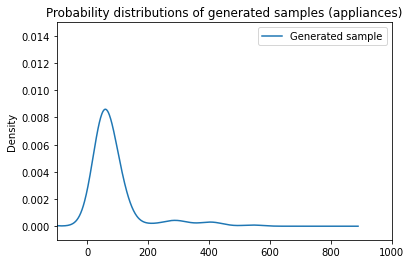

In [ ]:
plt.figure(4)
X1 = pd.DataFrame(X1, columns=['appl_generated'])
#print(X1)
X1['appl_generated'].plot(kind='kde', label='Generated sample')
plt.axis([-100,1000,-0.001,0.015]) #rescaling x axes
plt.title('Probability distributions of generated samples (appliances)')
legend = plt.legend()

Text(0, 0.5, 'Sum of consumptions (Wh)')

<Figure size 432x288 with 0 Axes>

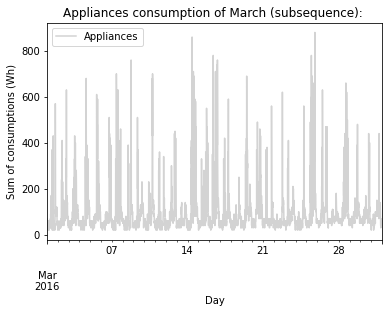

In [ ]:
import matplotlib.pyplot as plt 

#plotting the predicted subsequence 
plt.figure(0)
subseq.plot(c='lightgrey', zorder=-1)
plt.title('Appliances consumption of March (subsequence): ')
plt.xlabel('Day')
plt.ylabel('Sum of consumptions (Wh)')

Check if the series is stationary:

Use Augmented Dickey-Fuller test (ADF): The intuition behind the test is that if the series is characterised by a unit root process then the lagged level of the series (yt-1) will provide no relevant information in predicting the change in yt.



Parameters of appliances model.
- Transition matrix: 
 [[0.97016469 0.01824149 0.01159383]
 [0.05091614 0.88122248 0.06786138]
 [0.02264826 0.17227499 0.80507675]]

 Log likelihood: 
 -91386.03


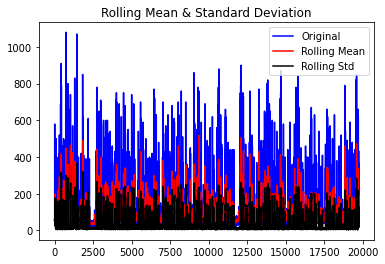

ADF Statistic: -21.616378198036198
p-value: 0.0
Critical Values:
	1%: -3.430681600227742
	5%: -2.8616865555329394
	10%: -2.566848007525354


'adf = adfuller(dataset)\nadf, pvalue, critical_values = adf[0], adf[1], adf[4]\nprint(f"ADF: {adf}\np-value: {pvalue}")\nprint("Critical values:")\nfor k, v in critical_values.items():\n    print(f"{k}: {v}")'

In [ ]:
from statsmodels.tsa.stattools import adfuller

def get_stationarity(timeseries):
    
    # rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()
    
    # rolling statistics plot
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Dickey–Fuller test:
    result = adfuller(df_appliances.to_numpy())
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))
        

get_stationarity(df_appliances)

"""adf = adfuller(dataset)
adf, pvalue, critical_values = adf[0], adf[1], adf[4]
print(f"ADF: {adf}\np-value: {pvalue}")
print("Critical values:")
for k, v in critical_values.items():
    print(f"{k}: {v}")"""

# since pvalue result is 0.0 it means that reject the null hypothesis (H0), the data does not have a unit root and is stationary.   

Now plot the autocorrelation and the partial autocorrelation to understand visually which lags have more influence on the current value yt:

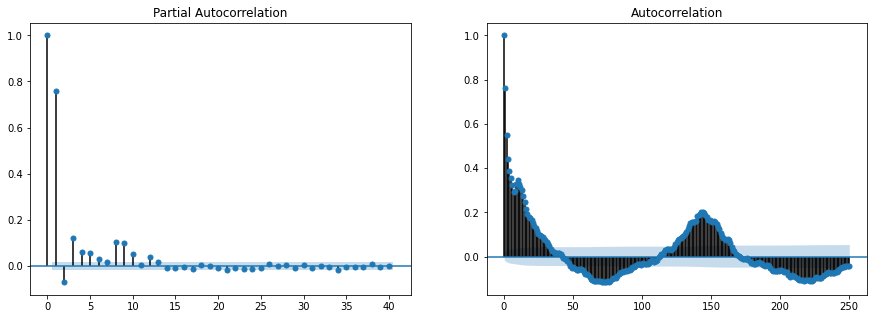

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

fig, ax = plt.subplots(1,2,figsize=(15,5))
plot_pacf(tr_data, lags=40, ax=ax[0])
plot_acf(tr_data, lags=250, ax=ax[1])
plt.show()

Since we have a repeating pattern the use of a AR model is a good choice

Model selection:
AR: try the following orders: 2, 3, 5, 10
ARMA: try the following orders: AR(3)+MA(1)
All the models will be trained with the training data (first 3 months) and tested on the test data (last 1.5 month) with the following retraining schedules:

Retrain after every prediction on the test set
Retrain every time the error is > 10
Retrain every time the error is > 50
Retrain every time the error is > 100
The error is measured in terms of Mean Absolute Error (MAE)

In [ ]:
!pip install statsmodels

In [ ]:
import itertools as it
from statsmodels.tsa.arima_model import ARIMA
from tqdm import tqdm

param_grid = {
        "p": [3,5,7,10],
        "d":[0],
        "q": [0,1],
        "tresh":[0, 10, 50, 100],
    }
keys = param_grid.keys()
combinations = it.product(*(param_grid[key] for key in keys))
param_list = list(combinations)

retrain = True
result_list = []

for elem in param_list:
    p = elem[0]
    d = elem[1]
    q = elem[2]
    err_thresh = elem[3]

    # fit model
    model = ARIMA(endog=tr_data, order=(p,d,q))
    res = model.fit()
    # summary of fit model
    #print(res.summary())

    # start forecasting on the test set and retrain when needed
    idx_last_retrain = 0
    count_no_retrain = 1
    predictions = []
    for i in tqdm(range(len(ts_data))):
        predictions.append(res.forecast(steps=count_no_retrain)[-1])
        print(ts_data[i])
        print(predictions[-1])
        err = abs(ts_data[i] - predictions[-1])
        print(err)
        #if err > err_thresh:
        #    idx_last_retrain = i
        #    count_no_retrain = 1
        #    tr_data = np.concatenate((tr_data, ts_data[idx_last_retrain: i + 1]))
        #    model = ARIMA(endog=tr_data, order=(p, 0, q))
        #    res = model.fit()
        #else:
        #    count_no_retrain += 1
        break

    # compute mean absolute error (MAE)
    mae = np.mean(np.abs(np.subtract(ts_data, predictions)))
    out = {'mae': mae, 'predictions': predictions}
    #filename = str(p) + "_" + str(q) + "_" + str(err_thresh) + "_retrain" if retrain else "" + ".json"
    #with open(filename, 'w') as outf:
    #    json.dump(out, outf, indent='\t')
    result_list.append(out)
    break


  0%|          | 0/6630 [00:00<?, ?it/s]

80
[[-47.95123632 221.05182963]]
[[127.95123632 141.05182963]]


ValueError: ignored